In [1]:
import sys
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Dataset details 
image_height = 150
image_width = 150
number_of_channels = 3
number_of_classes = 6

In [3]:
#Hyper-Parameters
batch_size = 64
NUMBER_OF_EPOCHS = 12
LEARNING_RATE = 0.0007

In [4]:
print("############-------- START --------############")
print("This code run on on Python version : ", sys.version)
# Print statement check tensorflow is running
print("The Tensorflow version used is : " + tf. __version__)

############-------- START --------############
This code run on on Python version :  3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]
The Tensorflow version used is : 2.10.0


In [5]:
# Load Image Data from local computer
# Use seg_train folder for training
train_set = tf.keras.preprocessing.image_dataset_from_directory(r"E:\Work\vs_code\Assessment_Oct22\SceneryDataset\seg_train",
color_mode= "rgb",
batch_size=batch_size,
image_size=(image_height, image_width),
shuffle=True,
seed=123)

# Use seg_test folder for hold-out validation
validation_set = tf.keras.preprocessing.image_dataset_from_directory(r"E:\Work\vs_code\Assessment_Oct22\SceneryDataset\seg_test",
color_mode= "rgb",
batch_size=batch_size,
image_size=(image_height, image_width),
shuffle=True,
seed=123)

print(train_set.class_names)
print(validation_set.class_names)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [6]:
# Build the model
AUTOTUNE = tf.data.AUTOTUNE

# Data augmentation - options - flipped left-right as mirror,introduced perturbations in contrast and brightness and rotated by delta
image_augmentation = keras.Sequential(
    [       
        layers.RandomFlip(mode="horizontal",
                        input_shape=(image_height,
                                    image_width,
                                    3)),
        layers.RandomContrast(factor=0.1,),
        layers.RandomBrightness(factor=0.15),
        layers.RandomRotation(0.1)
    ]
)
class_names = train_set.class_names
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

train_set = train_set.cache().prefetch(buffer_size=AUTOTUNE)
validation_set = validation_set.cache().prefetch(buffer_size=AUTOTUNE)

# Model creation - this model includes dropout regularization
model = tf.keras.Sequential([
  image_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(number_of_classes)
])


(64, 150, 150, 3)
(64,)


In [7]:
#Model creation - continued...
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Learning rate scheduler - regularization
def lr_scheduler(epoch, lr):
  if epoch < 3:
    return lr
  else:
    return lr * 0.99

# callbacks for training and regularisation
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)

#early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [8]:
# Train the model
history = model.fit(
  train_set,
  validation_data=validation_set,
  epochs=NUMBER_OF_EPOCHS,
  callbacks=[lr_scheduler_callback]
)

model.evaluate(validation_set, verbose=2)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/12
220/220 [==============================] - 109s 486ms/step - loss: 1.1216 - accuracy: 0.5537 - val_loss: 0.8619 - val_accuracy: 0.6750 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/12
220/220 [==============================] - 112s 510ms/step - loss: 0.8474 - accuracy: 0.6799 - val_loss: 0.7357 - val_accuracy: 0.7443 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/12
220/220 [==============================] - 113s 513ms/step - loss: 0.7407 - accuracy: 0.7256 - val_loss: 0.6948 - val_accuracy: 0.7557 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0009900000470224768.
Epoch 4/12
220/220 [==============================] - 114s 518ms/step - loss: 0.6582 - accuracy: 0.7575 - val_loss: 0.5899 - val_accuracy: 0.7857 - lr: 9.9000e-04

Epoch 5: LearningRateScheduler setting 

[0.4954838752746582, 0.8326666951179504]

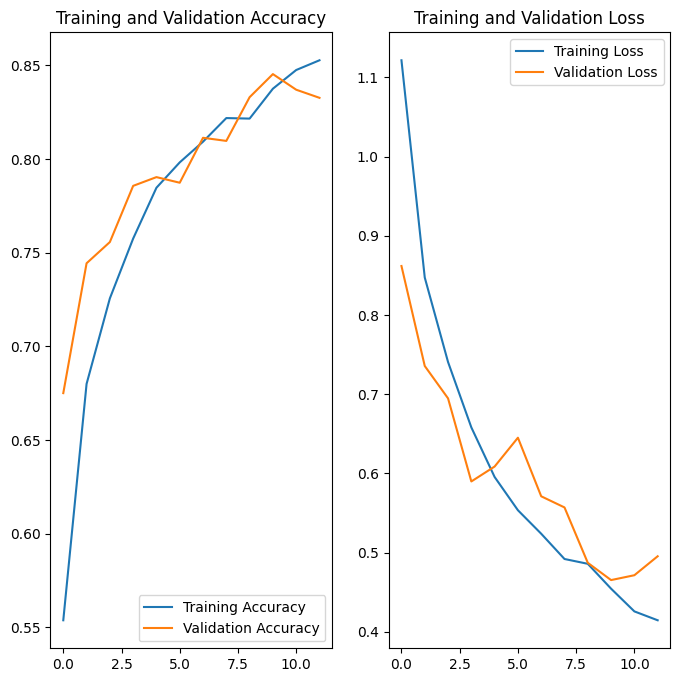

In [9]:
# Track training progress
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(NUMBER_OF_EPOCHS)

# Plot training and validation graphs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 0s 62ms/step
[-0.6884519  8.922602  -2.5705857 -6.820157  -2.360696  -3.8794403]
/n


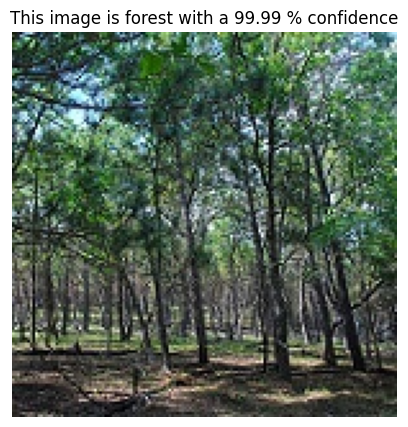

In [10]:
# Predict on new images
pred_img = tf.keras.utils.load_img(
    r"E:\Work\vs_code\Assessment_Oct22\SceneryDataset\seg_pred\9992.jpg", target_size=(image_height, image_width), color_mode="rgb"
)
plt.figure(2,figsize=(5, 5))
plt.imshow(pred_img)

img_array = tf.keras.utils.img_to_array(pred_img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
prediction_list = model.predict(img_array) 
prediction = prediction_list[0]
score = tf.nn.softmax(prediction_list[0])
predictionIndex = np.argmax(prediction)
predictedClass = class_names[predictionIndex]
prediction_confidence = round (100 * np.max(prediction), 2)

for prediction_vals in prediction_list:
    print(prediction_vals)
    print("/n")

title_string  = "This image is {} with a {:.2f} % confidence". format(class_names[np.argmax(score)], 100 * np.max(score))
plt.title(title_string)
plt.axis('off')
plt.show()

# Save model to local computer
#model.save('saved_model/')

In [16]:
print( "The best validation accuracy achieved with this configuration is {:.2f} % confidence". format( 100 * max(val_acc)))

The best validation accuracy achieved with this configuration is 84.53 % confidence
